## Variational Autoencoder for handwritten digit generation

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pickle
import numpy as np
from PIL import Image
import utils.utils as utils
from matplotlib import pyplot as plt
from variational_autoencoder import VariationalAutoencoder

%matplotlib inline 


/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Data and constants for use throughout this notebook:

# MNIST data, 50040 different 28 x 28 x 1 images (altogether a 4 tensor) with values from 0 to 255. 
data = utils.load_mnist_data()
print('Data shape:', data.shape)

INPUT_X = data.shape[1] # x dimension of input images,
INPUT_Y = data.shape[2] # y dimension of input images,
INPUT_Z = data.shape[3] # z dimension (only one, images are black and white).

inputs_shape_list = [INPUT_X, INPUT_Y, INPUT_Z]


Data shape: (50040, 28, 28, 1)


## Variational Autoencoder with fully connected layers

Train a new variational autoencoder with
    1. encoder = three fully connected layers,
    2. decoder = three fully connected layers.

In [4]:
# Train a new fully connected model:

encoder_list = [{'layer_type': 'reshape', 'output_shape': [int(np.prod(inputs_shape_list))]},
                {'layer_type': 'full_cn', 'output_shape': [500], 'activation': 'relu'},
                {'layer_type': 'full_cn', 'output_shape': [500], 'activation': 'relu'},
                {'layer_type': 'full_cn', 'output_shape': [20]}]

decoder_list = [{'layer_type': 'full_cn', 'output_shape': [500], 'activation': 'relu'},
                {'layer_type': 'full_cn', 'output_shape': [500], 'activation': 'relu'},
                {'layer_type': 'full_cn', 'output_shape': [int(np.prod(inputs_shape_list))], 'activation': 'sigmoid'},
                {'layer_type': 'reshape', 'output_shape': inputs_shape_list}]

model_details_dict = {'encoder_list': encoder_list,
                      'decoder_list': decoder_list,
                      'inputs_shape_list': inputs_shape_list,
                      'project_name': 'mnist',
                      'model_name': 'mnist_model'}

with VariationalAutoencoder(model_details_dict) as VAE:
    fc_model_name = VAE.model_name
    fc_project_name = VAE.project_name
    VAE.train_model(data)
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epoch 5 of 75 completed. Total time elapsed so far: 81.435
----------------------------------------------------------
Loss over all input data: 107.199
Time to train last epoch: 15.933


Epoch 10 of 75 completed. Total time elapsed so far: 169.206
------------------------------------------------------------
Loss over all input data: 103.258
Time to train last epoch: 17.283


Epoch 15 of 75 completed. Total time elapsed so far: 251.771
------------------------------------------------------------
Loss over all input data: 101.358
Time to train last epoch: 14.262


Epoch 20 of 75 completed. Total time elapsed so far: 330.617
------------------------------------------------------------
Loss over all input data: 100.338
Time to train last epoch: 17.87


Epoch 25 of 75 completed. Total time elapsed so far: 421.048
----------------------------------------------------------

In [5]:
# Check out the computational graph with tensorboard:

model_details_dict = {'model_name': fc_model_name,
                      'project_name': fc_project_name}

with VariationalAutoencoder(model_details_dict) as VAE: 
        VAE.show_graph()
        

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/smflores/Repos/variational-autoencoder/mnist/models/mnist_model_2019-03-20T13-54-01.905664/mnist_model_2019-03-20T13-54-01.905664


INFO:tensorflow:Restoring parameters from /Users/smflores/Repos/variational-autoencoder/mnist/models/mnist_model_2019-03-20T13-54-01.905664/mnist_model_2019-03-20T13-54-01.905664


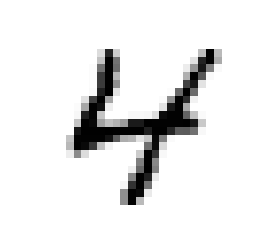

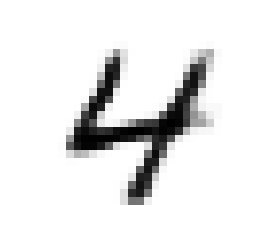

In [6]:
# Use the above trained model to generate fake handwritten digits:

model_details_dict = {'model_name': fc_model_name,
                      'project_name': fc_project_name}

image_num = 100

with VariationalAutoencoder(model_details_dict) as VAE:
    
    input_image = data[image_num:image_num + 1]
    faked_image = VAE.reform(input_image)
    
    for image in [input_image, faked_image]:
    
        plt.imshow(np.squeeze(image[0], axis = 2), cmap = 'Greys')
        plt.axis('off')
        plt.show()
    
    

## Variational Autoencoder with convolution layers

Train a new variational autoencoder with
    1. encoder = two convolution layers,
    2. decoder = two deconvolution layers.

In [ ]:
# Train a new convolutional model:

encoder_list = [{'layer_type': 'convolu', 'kernel_shape': [5, 5], 'output_chann': [32], 'pool_shape': [2, 2], 'activation': 'relu'},
                {'layer_type': 'convolu', 'kernel_shape': [3, 3], 'output_chann': [4],  'pool_shape': [2, 2]}]

decoder_list = [{'layer_type': 'deconvo', 'kernel_shape': [3, 3], 'output_chann': [32], 'pool_shape': [2, 2], 'activation': 'relu'},
                {'layer_type': 'deconvo', 'kernel_shape': [5, 5], 'output_chann': [1],  'pool_shape': [2, 2], 'activation': 'sigmoid'}]

model_details_dict = {'encoder_list': encoder_list,
                      'decoder_list': decoder_list,
                      'inputs_shape_list': inputs_shape_list,
                      'project_name': 'mnist',
                      'model_name': 'mnist_model'}

with VariationalAutoencoder(model_details_dict) as VAE:
    conv_model_name = VAE.model_name
    conv_project_name = VAE.project_name
    VAE.train_model(data)
    